# EDA e Classificação de Notícias com AG News (via CSV)

## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import re


## Carregando os dados

In [2]:
# Baixar dataset: https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset
# Certifique-se que ag_news.csv está no mesmo diretório

In [3]:
# Carregar os dados
train_df = pd.read_csv('../data/raw/train.csv')#, names=['Class', 'Title', 'Description'])
test_df = pd.read_csv('../data/raw/test.csv')

# Mapeamento das classes
class_mapping = {
    1: 'World',
    2: 'Sports',
    3: 'Business',
    4: 'Sci/Tech'
}
train_df['Class'] = train_df['Class Index'].map(class_mapping)
test_df['Class'] = test_df['Class Index'].map(class_mapping)
#Realizar drop de variáveis
train_df = train_df.drop(['Class Index'], axis = 1)
test_df = test_df.drop(['Class Index'], axis = 1)

display(train_df.head(),train_df.shape, test_df.head(), test_df.shape)

,Title,Description,Class
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business


(120000, 3)

,Title,Description,Class
0,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Business
1,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",Sci/Tech
2,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,Sci/Tech
3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Sci/Tech
4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Sci/Tech


(7600, 3)

## Processamento

Distribuição de Classes no Conjunto de Treino:


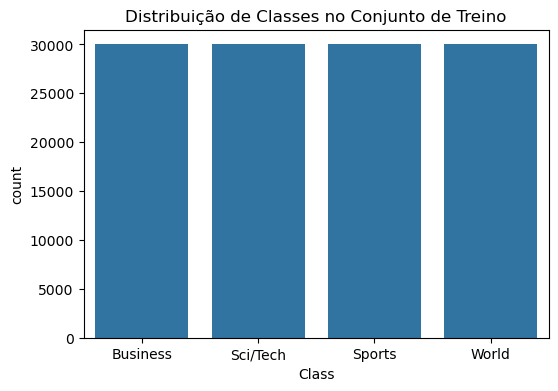

In [4]:
print('Distribuição de Classes no Conjunto de Treino:')

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=train_df, order=train_df['Class'].value_counts().index)
plt.title('Distribuição de Classes no Conjunto de Treino')

# Salvar imagem
plt.savefig('../reports/figures/class_distribution_train.png', dpi=300, bbox_inches='tight')

# Mostrar gráfico
plt.show()

In [5]:
# Combinar título e descrição para formar o texto
print('Combinar título e descrição para formar o texto:')
train_df['Text'] = train_df['Title'] + " " + train_df['Description']
test_df['Text'] = test_df['Title'] + " " + test_df['Description']

Combinar título e descrição para formar o texto:


In [6]:
# Função de limpeza do texto
print('Função de limpeza do texto:')
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train_df['Clean_Text'] = train_df['Text'].apply(preprocess_text)
test_df['Clean_Text'] = test_df['Text'].apply(preprocess_text)

Função de limpeza do texto:


In [7]:
# Vetorização com TF-IDF
print('Vetorização com TF-IDF:')
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['Clean_Text'])
X_test = vectorizer.transform(test_df['Clean_Text'])
y_train = train_df['Class']
y_test = test_df['Class']

Vetorização com TF-IDF:


## Modelagem 


Logistic Regression - Accuracy: 0.9041

              precision    recall  f1-score   support

    Business       0.87      0.87      0.87      1900
    Sci/Tech       0.87      0.88      0.88      1900
      Sports       0.95      0.97      0.96      1900
       World       0.92      0.90      0.91      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



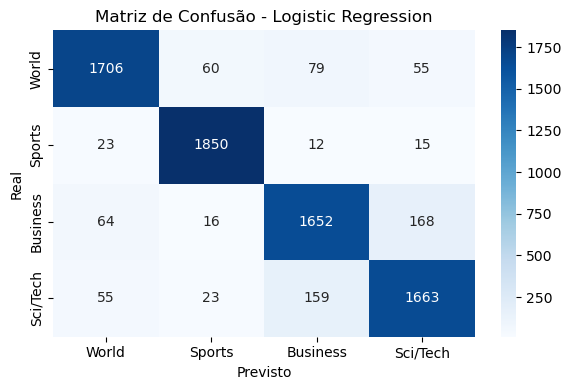


Multinomial Naive Bayes - Accuracy: 0.8882

              precision    recall  f1-score   support

    Business       0.86      0.83      0.85      1900
    Sci/Tech       0.86      0.86      0.86      1900
      Sports       0.94      0.97      0.95      1900
       World       0.90      0.89      0.89      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



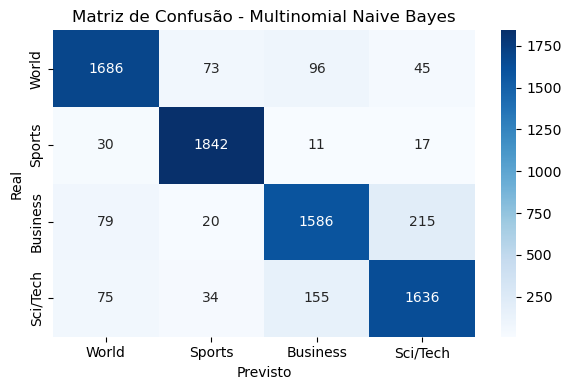


Random Forest - Accuracy: 0.8667

              precision    recall  f1-score   support

    Business       0.85      0.82      0.83      1900
    Sci/Tech       0.82      0.83      0.83      1900
      Sports       0.89      0.95      0.92      1900
       World       0.91      0.86      0.88      1900

    accuracy                           0.87      7600
   macro avg       0.87      0.87      0.87      7600
weighted avg       0.87      0.87      0.87      7600



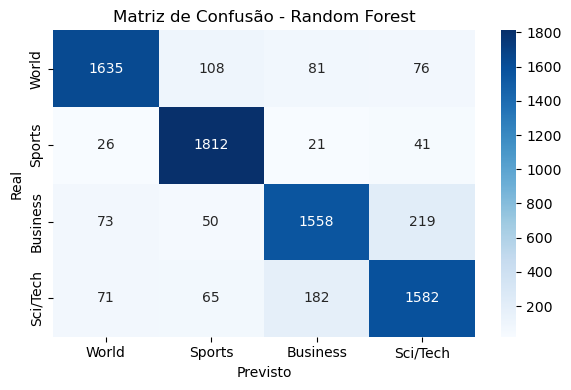


Linear SVM - Accuracy: 0.9033

              precision    recall  f1-score   support

    Business       0.87      0.87      0.87      1900
    Sci/Tech       0.87      0.87      0.87      1900
      Sports       0.95      0.98      0.96      1900
       World       0.92      0.90      0.91      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



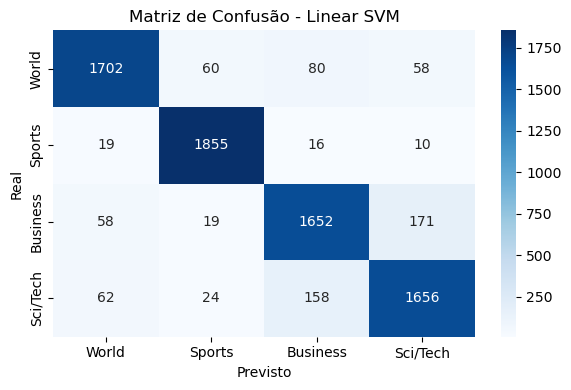


Resumo das Acurácias:
                 Modelo  Acurácia  Precision   Recall  F1_Score
    Logistic Regression  0.904079   0.903932 0.904079  0.903923
             Linear SVM  0.903289   0.903127 0.903289  0.903096
Multinomial Naive Bayes  0.888158   0.887633 0.888158  0.887762
          Random Forest  0.866711   0.866718 0.866711  0.866243


In [10]:
# Modelos a serem testados
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Linear SVM': LinearSVC(random_state=42)
}

# Avaliar todos os modelos
resultados = []
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    # auc = roc_auc_score(y_test, y_pred)
    print(f"\n\033[1m{nome}\033[0m - Accuracy: {acc:.4f}\n")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=list(class_mapping.values()))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.values(), yticklabels=class_mapping.values())
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.tight_layout()
    # Salvar imagem
    plt.savefig(f'../reports/figures/confusion_matrix_{nome.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()
    resultados.append({'Modelo': nome, 'Acurácia': acc, 'Precision': prec, 'Recall': rec, 'F1_Score': f1})

# Comparar Acurácias
df_resultados = pd.DataFrame(resultados).sort_values(by='Acurácia', ascending=False)
print("\nResumo das Acurácias:")
print(df_resultados.to_string(index=False))


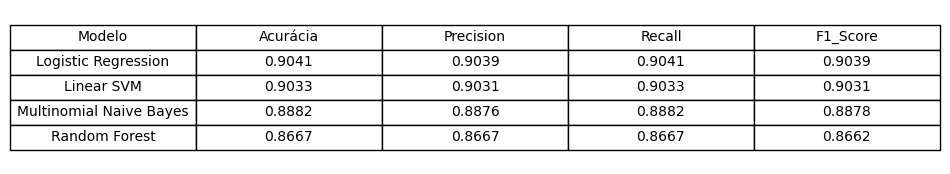

In [11]:
# Criar a figura
df_resultados = df_resultados.round(4)

fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')  # Remove os eixos

# Criar a tabela
table = ax.table(cellText=df_resultados.values, colLabels=df_resultados.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)  # Ajuste da escala para melhor visualização

# Salvar como PNG
plt.savefig('../reports/figures/model_comparison_table.png', bbox_inches='tight', dpi=300)
plt.show()
